<html lang="en">
<head>
  <h1>Dog and Owner Characteristics Predict Training Success Dataset</h1>
  <meta charset="utf-8">
</head>
<body>

<div class="alert alert-info">
<strong>Part 2: </strong> Pandas DataFrame, Data Visualizations
</div>

</body>
</html>

## Part 1 -  Retrieve the data, create a DataFrame

In [35]:
import pandas as pd
import numpy as np
df = pd.read_csv('../data/raw/stevens_etal_2020_data1.csv')

## Part 2 -  Use the data

I would like to use this data to see if there is a correlation between the success of the dogs training to columns such as hours dogs trained and owner gender.

In [6]:
df

,id,date,class,dog_age,dog_sex,dog_neutered,owner_gender,time_train_dog_weekly_num,dog_behavior_bennett_disobedient_score,dog_behavior_bennett_aggressive_score,...,pss_score,crt_score,numeracy_score,latency_sit_mean,latency_down_mean,cort1,cort2,cort3,cort4,cgc_test
0,1,9/9/18,F18,< 1 year old,Male,No,Female,0.75,-0.05,-0.64,...,0.7,2.0,3.0,30.0,1.0,0.165,0.6330,NaN,NaN,Pass
1,2,9/10/18,F18,< 1 year old,Male,No,Female,8.50,-0.18,0.38,...,1.1,1.0,2.0,1.0,2.5,0.309,0.1810,0.534,0.303,Pass
2,3,NaN,F18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.0,NaN,0.877,0.5790,NaN,NaN,NaN
3,4,9/14/18,F18,< 1 year old,Female,No,Female,2.00,0.15,-0.42,...,2.3,2.0,3.0,1.5,2.0,0.356,0.1980,NaN,NaN,Pass
4,5,NaN,F18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.0,NaN,0.2110,0.364,0.300,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,NaN,U19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.5,1.0,0.215,0.3830,NaN,NaN,NaN
95,96,NaN,U19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,30.0,0.368,0.2190,NaN,NaN,NaN
96,97,5/15/19,U19,1 year old,Female,Yes,Female,0.75,0.50,-0.64,...,1.7,2.0,3.0,1.0,4.0,0.399,0.2770,0.184,0.120,Pass
97,98,5/14/19,U19,1 year old,Female,Yes,Female,2.00,0.10,-0.10,...,1.3,1.0,2.0,0.5,2.0,0.301,0.2330,0.680,0.434,Pass


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 37 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      99 non-null     int64  
 1   date                                    63 non-null     object 
 2   class                                   99 non-null     object 
 3   dog_age                                 62 non-null     object 
 4   dog_sex                                 63 non-null     object 
 5   dog_neutered                            63 non-null     object 
 6   owner_gender                            62 non-null     object 
 7   time_train_dog_weekly_num               63 non-null     float64
 8   dog_behavior_bennett_disobedient_score  63 non-null     float64
 9   dog_behavior_bennett_aggressive_score   63 non-null     float64
 10  dog_behavior_bennett_nervous_score      63 non-null     float64


### *Type Conversion: 'date' column*

In [17]:
# convert the date column to a date-object
import calendar
# showing all sales dates
pd.to_datetime(df['date'])
# cleaning 'SALE DATE' column
df['date'] = pd.to_datetime(df['date'])
# display dates
print(df['date'])

0    2018-09-09
1    2018-09-10
2           NaT
3    2018-09-14
4           NaT
        ...    
94          NaT
95          NaT
96   2019-05-15
97   2019-05-14
98   2019-05-13
Name: date, Length: 99, dtype: datetime64[ns]


### *Visualization: 'owner_gender' column*

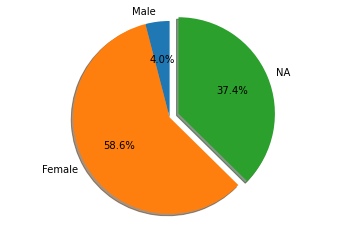

In [36]:
import matplotlib.pyplot as plt

# show the ratio between female and male dogs 
male_count = 0
female_count = 0
na_count = 0

# loop through 'dog_sex' column and count each category
for s in df['owner_gender']: 
    if s == 'Male': 
        male_count += 1
    if s == 'Female': 
        female_count += 1
    if pd.isna(s): 
        na_count += 1

# total number of entries
total_count = male_count + female_count + na_count

# calculate percentages for each pie slice
m_percent = (male_count / total_count) * 100
f_percent = (female_count / total_count) * 100
na_percent = (na_count / total_count) * 100

# labels of the categories displayed in the pie chart 
labels = [r'Male', r'Female', r'NA']
# sizes of each slice of the pie chart 
sizes = [m_percent, f_percent, na_percent]
explode = (0, 0, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

### *Calculate Summary Statistics: 'time_train_dog_weekly_num' column*

In [33]:
print('Mean: ', df['time_train_dog_weekly_num'].mean())
print('Median: ', df['time_train_dog_weekly_num'].median())
print('25th percentile: ', df['time_train_dog_weekly_num'].quantile(0.25))
print('75th percentile: ', df['time_train_dog_weekly_num'].quantile(0.75))
print('Max: ', df['time_train_dog_weekly_num'].max())
print('Min: ', df['time_train_dog_weekly_num'].min())

Mean:  1.2222222222222223
Median:  0.75
25th percentile:  0.25
75th percentile:  2.0
Max:  10.0
Min:  0.0


### *Calculate Value Counts: 'cgc_test' column*

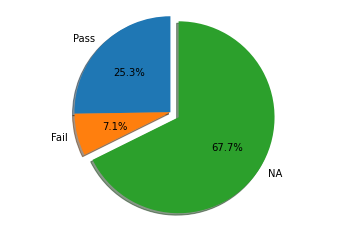

In [41]:
# does not count missing 
df['cgc_test'].value_counts()

pass_count = 0
fail_count = 0
test_na_count = 0
for test in df['cgc_test']: 
    if test == 'Pass': 
        pass_count += 1
    if test == 'Fail': 
        fail_count += 1
    if pd.isna(test): 
        test_na_count += 1
        
pass_percent = (pass_count /total_count ) * 100
fail_percent = (fail_count /total_count ) * 100
test_na_percent = (test_na_count /total_count ) * 100


# labels of the categories displayed in the pie chart 
labels = [r'Pass', r'Fail', r'NA']
# sizes of each slice of the pie chart 
sizes = [pass_percent, fail_percent, test_na_percent]
explode = (0, 0, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()